## preparing and getting to know the data

This dataset can be troublesome to automatically download depending on Google Drive's daily download quota. I recommend downloading it from google drive directly and move the files to the data folder inside this repository.

In [23]:
import torch
import torchvision

# Load the data
# this dataset requires the h5py package
pcam_data_train = torchvision.datasets.PCAM(
    root='./data',
    split='val',
    download=False,
    transform=torchvision.transforms.ToTensor() # otherwise the data is a PIL image
)

In [31]:
# data from pytorch is often a tuple of (data, label)

# have a look at the first sample
print("data of first sample is stored as ", type(pcam_data_train[0]), " with length ", len(pcam_data_train[0]))
print("the two elements of the tuple are data and label: ", [type(x) for x in pcam_data_train[0]])

data of first sample is stored as  <class 'tuple'>  with length  2
the two elements of the tuple are data and label:  [<class 'torch.Tensor'>, <class 'int'>]


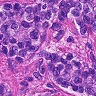

In [25]:
# if you want to visualize the data, you can convert it back to a PIL image

torchvision.transforms.ToPILImage()(pcam_data_train[0][0])

In [40]:
# what is the size of these images?

print(pcam_data_train[0][0].shape)
# this image has 3 channels (RGB) and is 96x96 pixels

# the label is binary and indicates the presence of metastatic tissue
print(pcam_data_train[0][1])

torch.Size([3, 96, 96])
1


In [39]:
# the label is binary and indicates the presence of metastatic tissue

all_labels = [x[1] for x in pcam_data_train]
print(all_labels)

[1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 

In [42]:
# check out the meta data

import pandas as pd
meta_data = pd.read_csv('./data/PCAM/camelyonpatch_level_2_split_valid_meta.csv')
meta_data

,Unnamed: 0,coord_y,coord_x,tumor_patch,center_tumor_patch,wsi
0,0,26496,35136,True,True,camelyon16_train_tumor_085
1,1,96576,59520,True,True,camelyon16_train_tumor_069
2,2,19840,46848,True,True,camelyon16_train_tumor_097
3,3,38720,69440,True,True,camelyon16_train_tumor_082
4,4,22848,23424,True,True,camelyon16_train_tumor_082
...,...,...,...,...,...,...
32763,32763,97344,68608,True,True,camelyon16_train_tumor_069
32764,32764,24128,88448,False,False,camelyon16_train_normal_143
32765,32765,101696,44032,True,True,camelyon16_train_tumor_065
32766,32766,71872,76672,False,False,camelyon16_train_tumor_073


## what I would do in a challenge

1. build CNN classifier and optimize hyperparams?
    If they ask, I can tell them about tools like optuna and wandb for efficient optimization and easy record keeping
2. compare generalization with and without position-invariance, rotation-equivariance
3. explainable AI: what information is a decision based on?

# My challenge

## build and train a classifier

### prepare the data

In [129]:
import torch
import torchvision

batch_size = 32
step = 1000

# Load the data
# this dataset requires the h5py package
pcam_data_train = torchvision.datasets.PCAM(
    root='./data',
    split='train',
    download=False,
    transform=torchvision.transforms.ToTensor() # otherwise the data is a PIL image
)
train_indices = list(range(0, len(pcam_data_train), step))
pcam_train_subset = torch.utils.data.Subset(pcam_data_train, train_indices)
#train_loader = torch.utils.data.DataLoader(pcam_train_subset, batch_size=batch_size, shuffle=True)

pcam_data_val = torchvision.datasets.PCAM(
    root='./data',
    split='val',
    download=False,
    transform=torchvision.transforms.ToTensor() # otherwise the data is a PIL image
)
val_indices = list(range(0, len(pcam_data_val), step))
pcam_val_subset = torch.utils.data.Subset(pcam_data_val, val_indices)
#val_loader = torch.utils.data.DataLoader(pcam_val_subset, batch_size=batch_size, shuffle=True)

In [2]:
import h5py

In [183]:
import h5py
hf = h5py.File('./data/pcam/camelyonpatch_level_2_split_valid_x.h5', 'r')
hf2 = h5py.File('./data/pcam/camelyonpatch_level_2_split_valid_x_subset.h5', 'w')
hf2.create_dataset('x', data=hf['x'][::2])
hf2.close()

In [184]:
hf = h5py.File('./data/pcam/camelyonpatch_level_2_split_test_x.h5', 'r')
hf2 = h5py.File('./data/pcam/camelyonpatch_level_2_split_test_x_subset.h5', 'w')
hf2.create_dataset('x', data=hf['x'][::2])
hf2.close()

In [3]:
hf = h5py.File('./data/pcam/camelyonpatch_level_2_split_train_x.h5', 'r')
hf2 = h5py.File('./data/pcam/camelyonpatch_level_2_split_train_x_subset.h5', 'w')
hf2.create_dataset('x', data=hf['x'][::2])
print(hf2['x'].shape)
hf2.close()

(13108, 96, 96, 3)


In [8]:
hf = h5py.File('./data/pcam/camelyonpatch_level_2_split_train_y.h5', 'r')
hf2 = h5py.File('./data/pcam/camelyonpatch_level_2_split_train_y_subset.h5', 'w')
hf2.create_dataset('y', data=hf['y'][::2])
print(hf2['y'].shape)
hf2.close()

(13108, 1, 1, 1)


In [12]:
hf = h5py.File('./data/pcam/camelyonpatch_level_2_split_valid_x.h5', 'r')
print(hf['x'].shape)
hf.close()

(1639, 96, 96, 3)


In [11]:
hf = h5py.File('./data/pcam/camelyonpatch_level_2_split_valid_x.h5', 'r')
hf2 = h5py.File('./data/pcam/camelyonpatch_level_2_split_valid_x_subset.h5', 'w')
hf2.create_dataset('x', data=hf['x'][::20])
hf2.close()
hf = h5py.File('./data/pcam/camelyonpatch_level_2_split_test_x.h5', 'r')
hf2 = h5py.File('./data/pcam/camelyonpatch_level_2_split_test_x_subset.h5', 'w')
hf2.create_dataset('x', data=hf['x'][::20])
hf2.close()
hf = h5py.File('./data/pcam/camelyonpatch_level_2_split_train_x.h5', 'r')
hf2 = h5py.File('./data/pcam/camelyonpatch_level_2_split_train_x_subset.h5', 'w')
hf2.create_dataset('x', data=hf['x'][::20])
hf2.close()

In [9]:
hf = h5py.File('./data/pcam/camelyonpatch_level_2_split_valid_y.h5', 'r')
hf2 = h5py.File('./data/pcam/camelyonpatch_level_2_split_valid_y_subset.h5', 'w')
hf2.create_dataset('y', data=hf['y'][::20])
hf2.close()
hf = h5py.File('./data/pcam/camelyonpatch_level_2_split_test_y.h5', 'r')
hf2 = h5py.File('./data/pcam/camelyonpatch_level_2_split_test_y_subset.h5', 'w')
hf2.create_dataset('y', data=hf['y'][::20])
hf2.close()
hf = h5py.File('./data/pcam/camelyonpatch_level_2_split_train_y.h5', 'r')
hf2 = h5py.File('./data/pcam/camelyonpatch_level_2_split_train_y_subset.h5', 'w')
hf2.create_dataset('y', data=hf['y'][::20])
hf2.close()

In [10]:
import pandas as pd
meta_data = pd.read_csv('./data/PCAM/camelyonpatch_level_2_split_valid_meta.csv')
meta_data = meta_data.iloc[::20]
meta_data.to_csv('./data/PCAM/camelyonpatch_level_2_split_valid_meta_subset.csv', index=False)
meta_data = pd.read_csv('./data/PCAM/camelyonpatch_level_2_split_test_meta.csv')
meta_data = meta_data.iloc[::20]
meta_data.to_csv('./data/PCAM/camelyonpatch_level_2_split_test_meta_subset.csv', index=False)
meta_data = pd.read_csv('./data/PCAM/camelyonpatch_level_2_split_train_meta.csv')
meta_data = meta_data.iloc[::20]
meta_data.to_csv('./data/PCAM/camelyonpatch_level_2_split_train_meta_subset.csv', index=False)

In [153]:
pcam_data_test = torchvision.datasets.PCAM(
    root='./data',
    split='test',
    download=False,
    transform=torchvision.transforms.ToTensor() # otherwise the data is a PIL image
)
test_indices = list(range(0, len(pcam_data_test), 100))
pcam_test_subset = torch.utils.data.Subset(pcam_data_test, test_indices)
test_loader = torch.utils.data.DataLoader(pcam_test_subset, batch_size=32, shuffle=True)

### baseline: logistic regression?

### building a CNN, and optimizing hyperparameters with optuna

In [110]:
# build a simple CNN with some flexibility for hyperparam optimization

import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self,
                 kernel_size=4,
                 num_filters=32,
                 num_layers_conv=3,
                 num_layers_fc=2,
                 n_hidden_fc=64,
                 dropout=0.1,
                 image_size=96,
                 stride=2):
        super(Net, self).__init__()
        self.kernel_size = kernel_size
        self.num_filters = num_filters
        self.num_layers_conv = num_layers_conv
        self.num_layers_fc = num_layers_fc
        self.dropout = dropout

        # build the encoder
        conv_size = image_size
        self.main = nn.ModuleList()
        for i in range(num_layers_conv):
            if i == 0:
                in_channels = 3
                out_channels = num_filters
            else:
                in_channels = num_filters
                out_channels = num_filters
            self.main.append(nn.Conv2d(in_channels=in_channels, out_channels=out_channels, kernel_size=kernel_size, stride=stride))
            self.main.append(nn.ReLU())
            #self.main.append(nn.MaxPool2d(pool_size, 1))
            #conv_size = int((conv_size - kernel_size)/stride) + 1 - pool_size + 1
            conv_size = int((conv_size - kernel_size)/stride) + 1
        self.main.append(nn.Flatten()) # transition from 2d tp 1d
        for i in range(num_layers_fc):
            if i == 0:
                self.main.append(nn.Linear(num_filters * conv_size * conv_size, n_hidden_fc))
            else:
                self.main.append(nn.Linear(n_hidden_fc, n_hidden_fc))
            self.main.append(nn.ReLU())
            self.main.append(nn.Dropout(dropout))
        self.main.append(nn.Linear(n_hidden_fc, 1))
        self.main.append(nn.Sigmoid())

    def forward(self, x):
        for layer in self.main:
            x = layer(x)
        return x.flatten()

In [106]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.7/365.7 kB 5.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 11.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.3/212.3 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.1/242.1 kB 5.4 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python3.10 -m pip install --upgrade pip


In [135]:
!pip install optuna-dashboard

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 5.0 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.2/90.2 kB 3.3 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python3.10 -m pip install --upgrade pip


In [136]:
!optuna-dashboard sqlite:///db.sqlite3

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sqlalchemy/engine/base.py", line 1964, in _exec_single_context
    self.dialect.do_execute(
  File "/usr/local/lib/python3.10/site-packages/sqlalchemy/engine/default.py", line 748, in do_execute
    cursor.execute(statement, parameters)
sqlite3.OperationalError: no such table: version_info

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/optuna/storages/_rdb/storage.py", line 69, in _create_scoped_session
    yield session
  File "/usr/local/lib/python3.10/site-packages/optuna/storages/_rdb/storage.py", line 1070, in _init_version_info_model
    version_info = models.VersionInfoModel.find(session)
  File "/usr/local/lib/python3.10/site-packages/optuna/storages/_rdb/models.py", line 596, in find
    version_info = session.query(cls).one_or_none()
  File "/usr/local/lib/python3.10/site-packages/sqlalche

In [107]:
import optuna

In [142]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# define an objective to optimize
def objective(trial):
    # sample hyperparameters
    kernel_size = trial.suggest_int('kernel_size', 2, 4)
    num_filters = trial.suggest_int('num_filters', 16, 64, log=True)
    num_layers_conv = trial.suggest_int('num_layers_conv', 1, 3)
    num_layers_fc = trial.suggest_int('num_layers_fc', 1, 3)
    n_hidden_fc = trial.suggest_int('n_hidden_fc', 16, 64, log=True)
    dropout = trial.suggest_float('dropout', 0., 0.5, step=0.1)
    stride = trial.suggest_int('stride', 1, 2)
    lr = trial.suggest_float('lr', 1e-4, 1e-2, log=True)
    batch_size = trial.suggest_categorical('batch_size', [32, 64, 128])
    # build the model
    model = Net(kernel_size=kernel_size,
                num_filters=num_filters,
                num_layers_conv=num_layers_conv,
                num_layers_fc=num_layers_fc,
                n_hidden_fc=n_hidden_fc,
                dropout=dropout,
                stride=stride)
    model = model.to(device)
    # define the optimizer
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    # define the loss function
    criterion = nn.BCELoss()
    # train the model
    train_loader = torch.utils.data.DataLoader(pcam_train_subset, batch_size=batch_size, shuffle=True)
    model.train()
    for epoch in range(5):
        for x, y in train_loader:
            x = x.to(device)
            y = y.to(device).float()
            y_pred = model(x)
            loss = criterion(y_pred, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
    # evaluate the model
    model.eval()
    val_loader = torch.utils.data.DataLoader(pcam_val_subset, batch_size=batch_size, shuffle=True)
    with torch.no_grad():
        for x, y in val_loader:
            x = x.to(device)
            y = y.to(device).float()
            y_pred = model(x)
            loss = criterion(y_pred, y)
            break
    return loss

In [143]:
study = optuna.create_study()
study.optimize(objective, n_trials=100)

study.best_params

[I 2023-04-17 15:34:43,178] A new study created in memory with name: no-name-60989ae4-5e3b-432e-a367-73a8519225ae
[I 2023-04-17 15:35:00,563] Trial 0 finished with value: 0.7010019421577454 and parameters: {'kernel_size': 4, 'num_filters': 32, 'num_layers_conv': 3, 'num_layers_fc': 3, 'n_hidden_fc': 64, 'dropout': 0.5, 'stride': 1, 'lr': 0.00017075016654035473, 'batch_size': 64}. Best is trial 0 with value: 0.7010019421577454.
[I 2023-04-17 15:35:04,183] Trial 1 finished with value: 0.7304602861404419 and parameters: {'kernel_size': 4, 'num_filters': 40, 'num_layers_conv': 3, 'num_layers_fc': 1, 'n_hidden_fc': 45, 'dropout': 0.30000000000000004, 'stride': 2, 'lr': 0.006377983071017453, 'batch_size': 32}. Best is trial 0 with value: 0.7010019421577454.
[I 2023-04-17 15:35:06,819] Trial 2 finished with value: 0.6806340217590332 and parameters: {'kernel_size': 3, 'num_filters': 22, 'num_layers_conv': 2, 'num_layers_fc': 2, 'n_hidden_fc': 44, 'dropout': 0.0, 'stride': 2, 'lr': 0.0029480506

{'kernel_size': 2,
 'num_filters': 45,
 'num_layers_conv': 1,
 'num_layers_fc': 1,
 'n_hidden_fc': 28,
 'dropout': 0.0,
 'stride': 2,
 'lr': 0.002175681303000298,
 'batch_size': 32}

### how many datapoints are needed?

### train a model

In [144]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# define an objective to optimize
def train(hyper_dict, n_epochs=10):
    # saving losses
    train_losses = []
    val_losses = []
    # sample hyperparameters
    kernel_size = hyper_dict['kernel_size']
    num_filters = hyper_dict['num_filters']
    num_layers_conv = hyper_dict['num_layers_conv']
    num_layers_fc = hyper_dict['num_layers_fc']
    n_hidden_fc = hyper_dict['n_hidden_fc']
    dropout = hyper_dict['dropout']
    stride = hyper_dict['stride']
    lr = hyper_dict['lr']
    batch_size = hyper_dict['batch_size']
    # build the model
    model = Net(kernel_size=kernel_size,
                num_filters=num_filters,
                num_layers_conv=num_layers_conv,
                num_layers_fc=num_layers_fc,
                n_hidden_fc=n_hidden_fc,
                dropout=dropout,
                stride=stride)
    model = model.to(device)
    # define the optimizer
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    # define the loss function
    criterion = nn.BCELoss()
    # train the model
    train_loader = torch.utils.data.DataLoader(pcam_train_subset, batch_size=batch_size, shuffle=True)
    for epoch in range(n_epochs):
        model.train()
        train_losses.append(0)
        val_losses.append(0)
        for x, y in train_loader:
            x = x.to(device)
            y = y.to(device).float()
            y_pred = model(x)
            loss = criterion(y_pred, y)
            optimizer.zero_grad()
            loss.backward()
            train_losses[-1] += loss.item()
            optimizer.step()
        train_losses[-1] /= len(train_loader)
        # evaluate the model
        model.eval()
        val_loader = torch.utils.data.DataLoader(pcam_val_subset, batch_size=batch_size, shuffle=True)
        with torch.no_grad():
            for x, y in val_loader:
                x = x.to(device)
                y = y.to(device).float()
                y_pred = model(x)
                loss = criterion(y_pred, y)
                val_losses[-1] += loss.item()
            val_losses[-1] /= len(val_loader)
    return model, train_losses, val_losses

In [145]:
model, train_losses, val_losses = train(study.best_params, n_epochs=10)

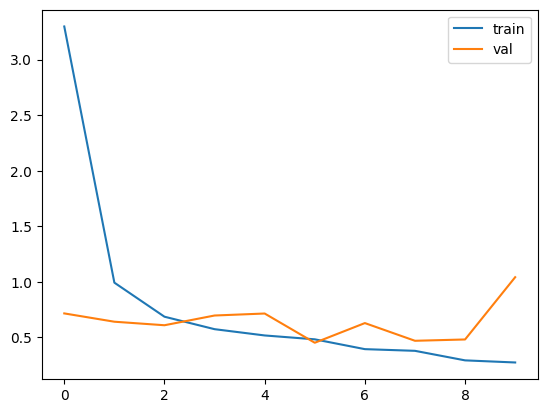

In [146]:
# plot the losses
import matplotlib.pyplot as plt
plt.plot(train_losses, label='train')
plt.plot(val_losses, label='val')
plt.legend()
plt.show()

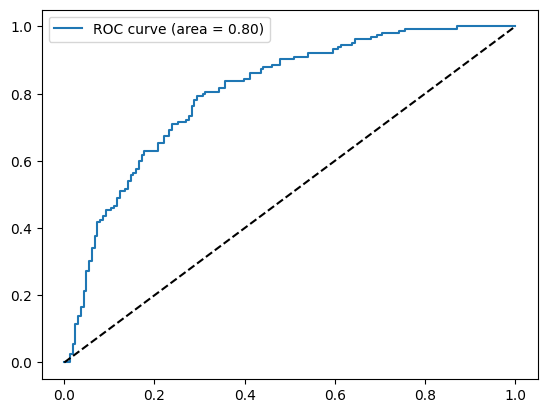

In [190]:
# plot test ROC curve
from sklearn.metrics import roc_curve, auc
model.eval()
test_loader = torch.utils.data.DataLoader(pcam_test_subset, batch_size=32, shuffle=True)
y_true = []
y_preds = []
with torch.no_grad():
    for x, y in test_loader:
        x = x.to(device)
        y = y.to(device).float()
        y_pred = model(x)
        y_true.extend(y.cpu().numpy())
        y_preds.extend(y_pred.cpu().numpy())
fpr, tpr, _ = roc_curve(y_true, y_preds)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.legend()
plt.show()

In [160]:
hyper_dict = study.best_params
steps = [1000, 500, 100, 50, 10]

def train(hyper_dict, step, n_epochs):
    print('training with step =', step)
    kernel_size = hyper_dict['kernel_size']
    num_filters = hyper_dict['num_filters']
    num_layers_conv = hyper_dict['num_layers_conv']
    num_layers_fc = hyper_dict['num_layers_fc']
    n_hidden_fc = hyper_dict['n_hidden_fc']
    dropout = hyper_dict['dropout']
    stride = hyper_dict['stride']
    lr = hyper_dict['lr']
    batch_size = hyper_dict['batch_size']
    # loaders
    train_indices = list(range(0, len(pcam_data_train), step))
    pcam_train_subset = torch.utils.data.Subset(pcam_data_train, train_indices)
    train_loader = torch.utils.data.DataLoader(pcam_train_subset, batch_size=batch_size, shuffle=True)
    val_indices = list(range(0, len(pcam_data_val), step))
    pcam_val_subset = torch.utils.data.Subset(pcam_data_val, val_indices)
    val_loader = torch.utils.data.DataLoader(pcam_val_subset, batch_size=batch_size, shuffle=True)
    # build model
    model = Net(kernel_size=kernel_size,
                num_filters=num_filters,
                num_layers_conv=num_layers_conv,
                num_layers_fc=num_layers_fc,
                n_hidden_fc=n_hidden_fc,
                dropout=dropout,
                stride=stride)
    model = model.to(device)
    # define the optimizer
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    # define the loss function
    criterion = nn.BCELoss()
    # train the model
    for epoch in range(n_epochs):
        model.train()
        for x, y in train_loader:
            x = x.to(device)
            y = y.to(device).float()
            y_pred = model(x)
            loss = criterion(y_pred, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        # evaluate the model
    model.eval()
    test_loss = 0
    with torch.no_grad():
        for x, y in test_loader:
            x = x.to(device)
            y = y.to(device).float()
            y_pred = model(x)
            loss = criterion(y_pred, y)
            test_loss += loss.item()
        test_loss /= len(test_loader)
    return len(train_indices), test_loss

In [161]:
test_losses = []
train_sample_sizes = []
for step in steps:
    step_samples, step_loss = train(hyper_dict, step, n_epochs=10)
    test_losses.append(step_loss)
    train_sample_sizes.append(step_samples)

training with step = 1000
training with step = 500
training with step = 100
training with step = 50
training with step = 10


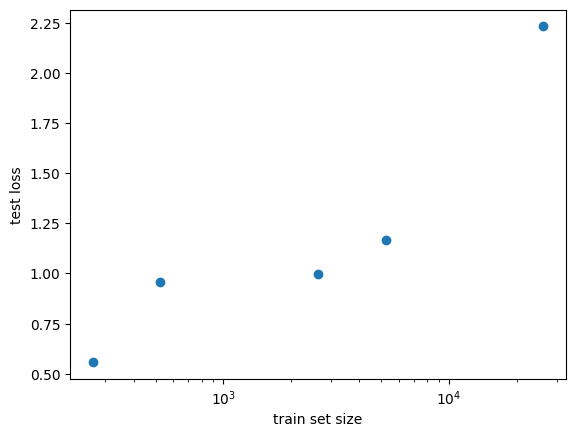

In [165]:
# plot test losses against train set size
plt.scatter(train_sample_sizes, test_losses)
plt.xscale('log')
plt.xlabel('train set size')
plt.ylabel('test loss')
plt.show()

## Evaluation

Test performance, plus test performance on pictures where the cancer is not in the middle (if there are even such pictures).

## XAI: understanding how the model makes decisions

### RISE

In [168]:
!pip install scikit-image
import numpy as np
import torch
import torch.nn as nn
from skimage.transform import resize
from tqdm import tqdm


class RISE(nn.Module):
    def __init__(self, model, input_size, gpu_batch=100):
        super(RISE, self).__init__()
        self.model = model
        self.input_size = input_size
        self.gpu_batch = gpu_batch

    def generate_masks(self, N, s, p1, savepath='masks.npy'):
        cell_size = np.ceil(np.array(self.input_size) / s)
        up_size = (s + 1) * cell_size

        grid = np.random.rand(N, s, s) < p1
        grid = grid.astype('float32')

        self.masks = np.empty((N, *self.input_size))

        for i in tqdm(range(N), desc='Generating filters'):
            # Random shifts
            x = np.random.randint(0, cell_size[0])
            y = np.random.randint(0, cell_size[1])
            # Linear upsampling and cropping
            self.masks[i, :, :] = resize(grid[i], up_size, order=1, mode='reflect',
                                         anti_aliasing=False)[x:x + self.input_size[0], y:y + self.input_size[1]]
        self.masks = self.masks.reshape(-1, 1, *self.input_size)
        np.save(savepath, self.masks)
        self.masks = torch.from_numpy(self.masks).float()
        self.masks = self.masks.cuda()
        self.N = N
        self.p1 = p1

    def load_masks(self, filepath):
        self.masks = np.load(filepath)
        self.masks = torch.from_numpy(self.masks).float().cuda()
        self.N = self.masks.shape[0]

    def forward(self, x):
        N = self.N
        _, _, H, W = x.size()
        # Apply array of filters to the image
        stack = torch.mul(self.masks, x.data)

        # p = nn.Softmax(dim=1)(model(stack)) processed in batches
        p = []
        for i in range(0, N, self.gpu_batch):
            p.append(self.model(stack[i:min(i + self.gpu_batch, N)]))
        p = torch.cat(p)
        # Number of classes
        CL = p.size(1)
        sal = torch.matmul(p.data.transpose(0, 1), self.masks.view(N, H * W))
        sal = sal.view((CL, H, W))
        sal = sal / N / self.p1
        return sal

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 19.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 16.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 19.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.4/219.4 kB 4.7 MB/s eta 0:00:0000:01

[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python3.10 -m pip install --upgrade pip


In [171]:
input_size = (96,96)
gpu_batch = 32
explainer = RISE(model, input_size)
# Generate masks for RISE
maskspath = 'masks.npy'
explainer.generate_masks(N=6000, s=8, p1=0.1, savepath=maskspath)

Generating filters: 100%|██████████| 6000/6000 [00:03<00:00, 1942.60it/s]


AssertionError: Torch not compiled with CUDA enabled

In [ ]:
def example(img):
    saliency = explainer(img.to(device)).cpu().numpy()
    print(model(img.to(device)))
    #p = model(img.to(device)).cpu().detach().numpy()
    #p, c = torch.topk(model(img.cuda()), k=top_k)
    p, c = torch.topk(model(img.to(device)), k=1)
    print(p, c)
    #p, c = p[0], c[0]
    
    plt.figure(figsize=(10, 5))
    plt.subplot(2,1)
    plt.axis('off')
    #plt.title('{:.2f}% {}'.format(100*p[k], get_class_name(c[k])))
    #tensor_imshow(img[0])
    torchvision.transforms.ToPILImage()(img).show()

    plt.subplot(2,1)
    plt.axis('off')
    #plt.title(get_class_name(c[k]))
    #tensor_imshow(img[0])
    torchvision.transforms.ToPILImage()(img).show()
    sal = saliency[c]
    plt.imshow(sal, cmap='jet', alpha=0.5)
    plt.colorbar(fraction=0.046, pad=0.04)

    plt.show()

example(pcam_data_train[0][0])

### Improving generalization

Does the model get better on the test performance if we train with augmented data?
- rotation
- cropping (and shifting)

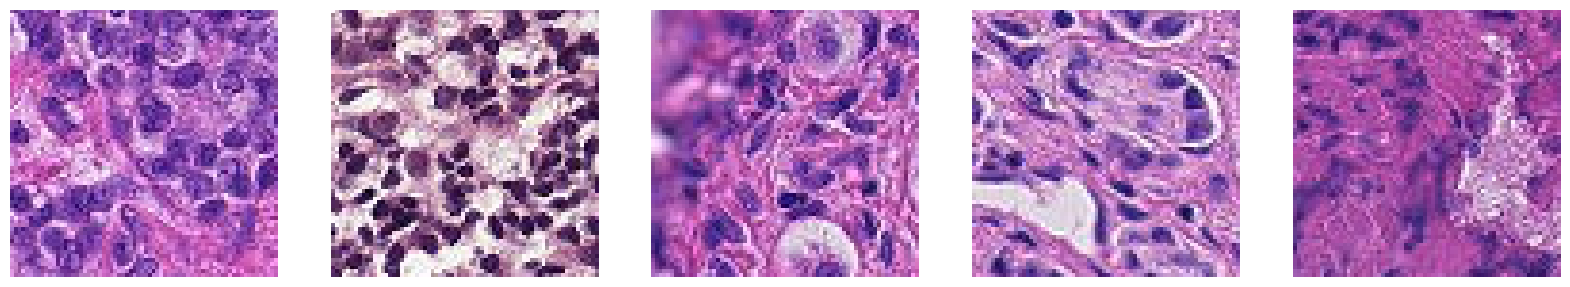

In [201]:
# first visualize the applied augmentation to see if it is enough

transform = torchvision.transforms.Compose([
    torchvision.transforms.RandomCrop(70, padding=0),
    torchvision.transforms.RandomHorizontalFlip(),
    torchvision.transforms.RandomVerticalFlip(),
    torchvision.transforms.ToTensor()
])
pcam_data_val_aug = torchvision.datasets.PCAM(
    root='./data',
    split='val',
    download=False,
    transform=transform
)

# visualize the augmented data
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(20, 5))
for i in range(5):
    ax[i].axis('off')
    ax[i].imshow(torchvision.transforms.ToPILImage()(pcam_data_val_aug[i][0]))
plt.show()

In [202]:
# now apply to train data
transform = torchvision.transforms.Compose([
    torchvision.transforms.RandomCrop(70, padding=0),
    torchvision.transforms.RandomHorizontalFlip(),
    torchvision.transforms.RandomVerticalFlip(),
    torchvision.transforms.ToTensor()
])
pcam_data_train = torchvision.datasets.PCAM(
    root='./data',
    split='train',
    download=False,
    transform=transform
)

In [203]:
# now train a model with rotated, cropped and shifted images

hyper_dict = {'kernel_size': 2,
 'num_filters': 45,
 'num_layers_conv': 1,
 'num_layers_fc': 1,
 'n_hidden_fc': 28,
 'dropout': 0.0,
 'stride': 2,
 'lr': 0.002175681303000298,
 'batch_size': 32}

def train(hyper_dict, step, n_epochs):
    print('training with step =', step)
    kernel_size = hyper_dict['kernel_size']
    num_filters = hyper_dict['num_filters']
    num_layers_conv = hyper_dict['num_layers_conv']
    num_layers_fc = hyper_dict['num_layers_fc']
    n_hidden_fc = hyper_dict['n_hidden_fc']
    dropout = hyper_dict['dropout']
    stride = hyper_dict['stride']
    lr = hyper_dict['lr']
    batch_size = hyper_dict['batch_size']
    # loaders
    train_indices = list(range(0, len(pcam_data_train), step))
    pcam_train_subset = torch.utils.data.Subset(pcam_data_train, train_indices)
    train_loader = torch.utils.data.DataLoader(pcam_train_subset, batch_size=batch_size, shuffle=True)
    val_indices = list(range(0, len(pcam_data_val), step))
    pcam_val_subset = torch.utils.data.Subset(pcam_data_val, val_indices)
    val_loader = torch.utils.data.DataLoader(pcam_val_subset, batch_size=batch_size, shuffle=True)
    # build model
    model = Net(kernel_size=kernel_size,
                num_filters=num_filters,
                num_layers_conv=num_layers_conv,
                num_layers_fc=num_layers_fc,
                n_hidden_fc=n_hidden_fc,
                dropout=dropout,
                stride=stride)
    model = model.to(device)
    # define the optimizer
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    # define the loss function
    criterion = nn.BCELoss()
    # train the model
    train_losses = []
    val_losses = []
    for epoch in range(n_epochs):
        model.train()
        train_losses.append(0)
        val_losses.append(0)
        for x, y in train_loader:
            x = x.to(device)
            y = y.to(device).float()
            y_pred = model(x)
            loss = criterion(y_pred, y)
            optimizer.zero_grad()
            loss.backward()
            train_losses[-1] += loss.item()
            optimizer.step()
        train_losses[-1] /= len(train_loader)
        # evaluate the model
        model.eval()
        val_loader = torch.utils.data.DataLoader(pcam_val_subset, batch_size=batch_size, shuffle=True)
        with torch.no_grad():
            for x, y in val_loader:
                x = x.to(device)
                y = y.to(device).float()
                y_pred = model(x)
                loss = criterion(y_pred, y)
                val_losses[-1] += loss.item()
            val_losses[-1] /= len(val_loader)
    return model, train_losses, val_losses

model, train_losses, val_losses = train(hyper_dict, step=100, n_epochs=2)

training with step = 100


RuntimeError: mat1 and mat2 shapes cannot be multiplied (32x55125 and 103680x28)